In [1]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import scipy.stats

In [2]:
df = pd.read_csv('./pitching_data_1996_2019.csv')
df.head()

starters = df[df["GS"] >= 3]
relievers = df[(df["GS"] < 3) & (df["SV"] <= 5)]
closers = df[df["SV"] > 5]

In [3]:
#group by player age, get batting avg
starters_age = starters[['Age', 'G', 'GS', 'IP', 'W', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']].groupby(['Age'], as_index=False).sum()
starters_age['W_PER_G'] = starters_age['W'] / starters_age['G']
starters_age['SO_PER_G'] = starters_age['SO'] / starters_age['G']
starters_age['AVG_ERA'] = 9 * (starters_age['ER'] / starters_age['IP'])
starters_age['AVG_WHIP'] = (starters_age['BB'] + starters_age['H']) / starters_age['IP']
#starters_age['QS_PER_GS'] = starters_age['QS'] / starters_age['GS']
starters_age['IP_PER_G'] = starters_age['IP'] / starters_age['G']

starters_age['DELTA_W_PER_G'] = 0.0
starters_age['PREV_W_PER_G'] = 0.0
starters_age['W_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_SO_PER_G'] = 0.0
starters_age['PREV_SO_PER_G'] = 0.0
starters_age['SO_PER_G_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_ERA'] = 0.0
starters_age['PREV_ERA'] = 0.0
starters_age['ERA_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_WHIP'] = 0.0
starters_age['PREV_WHIP'] = 0.0
starters_age['WHIP_PERCENT_CHANGE'] = 0.0

# starters_age['DELTA_QS_PER_GS'] = 0.0
# starters_age['PREV_QS_PER_GS'] = 0.0
# starters_age['QS_PER_GS_PERCENT_CHANGE'] = 0.0

starters_age['DELTA_IP_PER_G'] = 0.0
starters_age['PREV_IP_PER_G'] = 0.0
starters_age['IP_PER_G_PERCENT_CHANGE'] = 0.0

In [4]:
for i, r in starters_age.iterrows():
    if i != 0:
        starters_age.at[i,'DELTA_W_PER_G'] = starters_age.at[i,'W_PER_G'] - starters_age.at[i-1,'W_PER_G']
        starters_age.at[i,'PREV_W_PER_G'] = starters_age.at[i-1,'W_PER_G']
        starters_age.at[i,'W_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_W_PER_G']/starters_age.at[i,'PREV_W_PER_G']
        
        starters_age.at[i,'DELTA_SO_PER_G'] = starters_age.at[i,'SO_PER_G'] - starters_age.at[i-1,'SO_PER_G']
        starters_age.at[i,'PREV_SO_PER_G'] = starters_age.at[i-1,'SO_PER_G']
        starters_age.at[i,'SO_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_SO_PER_G']/starters_age.at[i,'PREV_SO_PER_G']
        
        starters_age.at[i,'DELTA_ERA'] = starters_age.at[i,'AVG_ERA'] - starters_age.at[i-1,'AVG_ERA']
        starters_age.at[i,'PREV_ERA'] = starters_age.at[i-1,'AVG_ERA']
        starters_age.at[i,'ERA_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_ERA']/starters_age.at[i,'PREV_ERA']
        
        starters_age.at[i,'DELTA_WHIP'] = starters_age.at[i,'AVG_WHIP'] - starters_age.at[i-1,'AVG_WHIP']
        starters_age.at[i,'PREV_WHIP'] = starters_age.at[i-1,'AVG_WHIP']
        starters_age.at[i,'WHIP_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_WHIP']/starters_age.at[i,'PREV_WHIP']
        
#         starters_age.at[i,'DELTA_QS_PER_GS'] = starters_age.at[i,'QS_PER_GS'] - starters_age.at[i-1,'QS_PER_GS']
#         starters_age.at[i,'PREV_QS_PER_GS'] = starters_age.at[i-1,'QS_PER_GS']
#         starters_age.at[i,'QS_PER_GS_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_QS_PER_GS']/starters_age.at[i,'PREV_QS_PER_GS']

        starters_age.at[i,'DELTA_IP_PER_G'] = starters_age.at[i,'IP_PER_G'] - starters_age.at[i-1,'IP_PER_G']
        starters_age.at[i,'PREV_IP_PER_G'] = starters_age.at[i-1,'IP_PER_G']
        starters_age.at[i,'IP_PER_G_PERCENT_CHANGE'] = starters_age.at[i,'DELTA_IP_PER_G']/starters_age.at[i,'PREV_IP_PER_G']
        
starters_age.head()

,Age,G,GS,IP,W,ER,SV,SO,WHIP,BB,...,SO_PER_G_PERCENT_CHANGE,DELTA_ERA,PREV_ERA,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
0,19,43,35,216.1,11,72,1,219,4.93,79,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,20,457,384,2246.3,135,1071,0,1806,38.04,899,...,-0.224064,1.292445,2.998612,0.431014,0.143700,1.221657,0.117627,-0.110264,5.025581,-0.021941
2,21,1737,1421,8369.0,471,4243,7,6592,159.40,3434,...,-0.039680,0.271854,4.291056,0.063354,0.058111,1.365356,0.042561,-0.097240,4.915317,-0.019783
3,22,4607,3878,23090.6,1379,11568,13,17570,383.26,8975,...,0.004931,-0.054063,4.562911,-0.011848,-0.017138,1.423468,-0.012039,0.193991,4.818077,0.040263
4,23,9343,7390,45064.3,2555,22491,39,35071,698.00,17306,...,-0.015744,-0.017066,4.508848,-0.003785,0.001303,1.406330,0.000927,-0.188746,5.012069,-0.037658


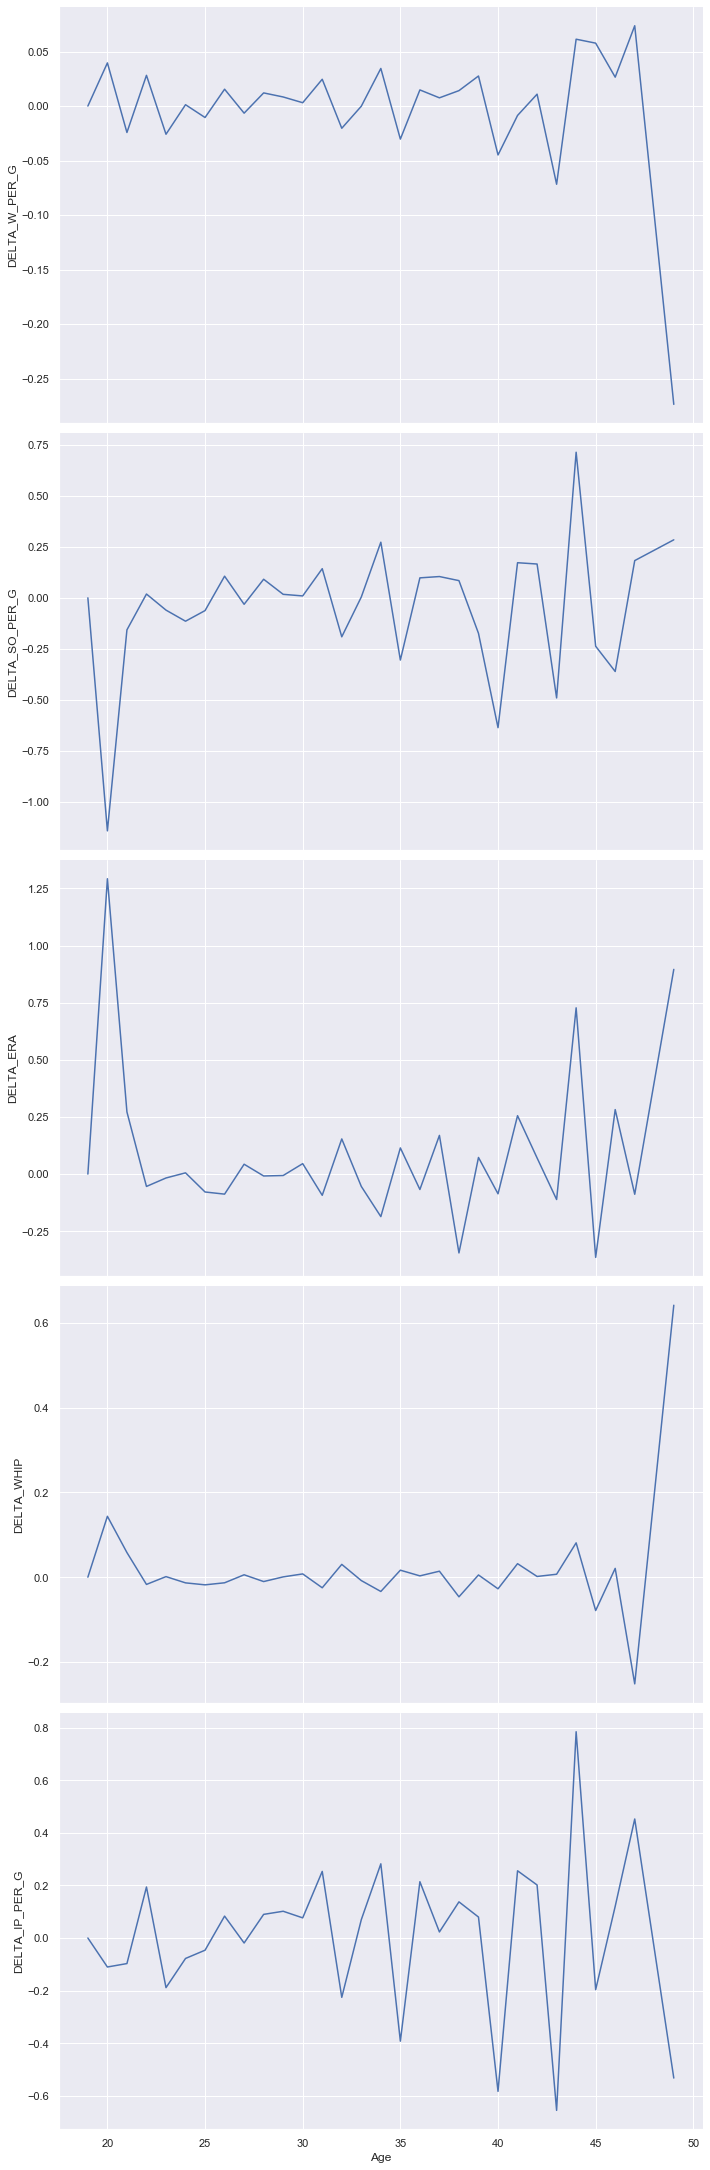

In [5]:
# explore delta of avg by age 
g = sns.PairGrid(starters_age, y_vars=["DELTA_W_PER_G", 
                                       "DELTA_SO_PER_G",
                                       "DELTA_ERA",
                                       "DELTA_WHIP",
#                                       "DELTA_QS_PER_GS",
                                      "DELTA_IP_PER_G"], x_vars=["Age"], height=6, aspect = 1.6)
g.map(sns.lineplot, markers=True)

In [6]:
# explore percent change by age and previous season's stat
df2 = starters[['key_mlbam', 'Age', 'G', 'GS', 'IP', 'W', 'ERA', 'ER', 'SV', 'SO', 'WHIP', 'BB', 'H']]
df2['W_PER_G'] = df2['W'] / df2['G']
df2['SO_PER_G'] = df2['SO'] / df2['G']
df2['IP_PER_G'] = df2['IP'] / df2['G']

df2['DELTA_W_PER_G'] = float("NaN")
df2['PREV_W_PER_G'] = float("NaN")
df2['W_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_SO_PER_G'] = float("NaN")
df2['PREV_SO_PER_G'] = float("NaN")
df2['SO_PER_G_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_ERA'] = float("NaN")
df2['PREV_ERA'] = float("NaN")
df2['ERA_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_WHIP'] = float("NaN")
df2['PREV_WHIP'] = float("NaN")
df2['WHIP_PERCENT_CHANGE'] = float("NaN")

# df2['DELTA_QS_PER_GS'] = float("NaN")
# df2['PREV_QS_PER_GS'] = float("NaN")
# df2['QS_PER_GS_PERCENT_CHANGE'] = float("NaN")

df2['DELTA_IP_PER_G'] = float("NaN")
df2['PREV_IP_PER_G'] = float("NaN")
df2['IP_PER_G_PERCENT_CHANGE'] = float("NaN")

for i, r in df2.iterrows():
    prev = df2[ (df2.key_mlbam==r.key_mlbam) & (df2['Age']==(r['Age']-1)) ]

    if len(prev)==1:
        df2.at[i,'DELTA_W_PER_G'] = r.W_PER_G - prev.W_PER_G
        df2.at[i,'PREV_W_PER_G'] = prev.W_PER_G
        df2.at[i,'W_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_W_PER_G']/df2.at[i,'PREV_W_PER_G']
        
        df2.at[i,'DELTA_SO_PER_G'] = r.SO_PER_G - prev.SO_PER_G
        df2.at[i,'PREV_SO_PER_G'] = prev.SO_PER_G
        df2.at[i,'SO_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_SO_PER_G']/df2.at[i,'PREV_SO_PER_G']
        
        df2.at[i,'DELTA_ERA'] = r.ERA - prev.ERA
        df2.at[i,'PREV_ERA'] = prev.ERA
        df2.at[i,'ERA_PERCENT_CHANGE'] = df2.at[i,'DELTA_ERA']/df2.at[i,'PREV_ERA']
        
        df2.at[i,'DELTA_WHIP'] = r.WHIP - prev.WHIP
        df2.at[i,'PREV_WHIP'] = prev.WHIP
        df2.at[i,'WHIP_PERCENT_CHANGE'] = df2.at[i,'DELTA_WHIP']/df2.at[i,'PREV_WHIP']
        
        df2.at[i,'DELTA_IP_PER_G'] = r.IP_PER_G - prev.IP_PER_G
        df2.at[i,'PREV_IP_PER_G'] = prev.IP_PER_G
        df2.at[i,'IP_PER_G_PERCENT_CHANGE'] = df2.at[i,'DELTA_IP_PER_G']/df2.at[i,'PREV_IP_PER_G']

# remove any rows where we dont have previous season data...ex: a player's first season
df2.dropna(axis=0, how='any', inplace=True)
df2.head()

/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/dhui/anaconda3/envs/py3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

,key_mlbam,Age,G,GS,IP,W,ERA,ER,SV,SO,...,SO_PER_G_PERCENT_CHANGE,DELTA_ERA,PREV_ERA,ERA_PERCENT_CHANGE,DELTA_WHIP,PREV_WHIP,WHIP_PERCENT_CHANGE,DELTA_IP_PER_G,PREV_IP_PER_G,IP_PER_G_PERCENT_CHANGE
0,118377,27,31,29,213.1,23,2.07,49,0,313,...,0.327464,-0.82,2.89,-0.283737,-0.17,1.09,-0.155963,-0.192473,7.066667,-0.027237
1,112388,34,34,34,264.0,21,2.05,60,0,292,...,0.136187,-1.58,3.63,-0.435262,-0.30,1.33,-0.225564,0.641176,7.123529,0.090008
2,116615,37,35,34,249.2,21,2.49,69,0,372,...,0.072046,-0.15,2.64,-0.056818,-0.11,1.12,-0.098214,0.028571,7.091429,0.004029
3,116615,36,35,35,248.2,19,2.64,73,0,347,...,-0.046703,0.16,2.48,0.064516,0.10,1.02,0.098039,-0.657143,7.748571,-0.084808
4,111554,33,36,35,257.0,18,2.38,68,0,257,...,0.149187,-0.31,2.69,-0.115242,-0.11,1.18,-0.093220,-0.045960,7.184848,-0.006397


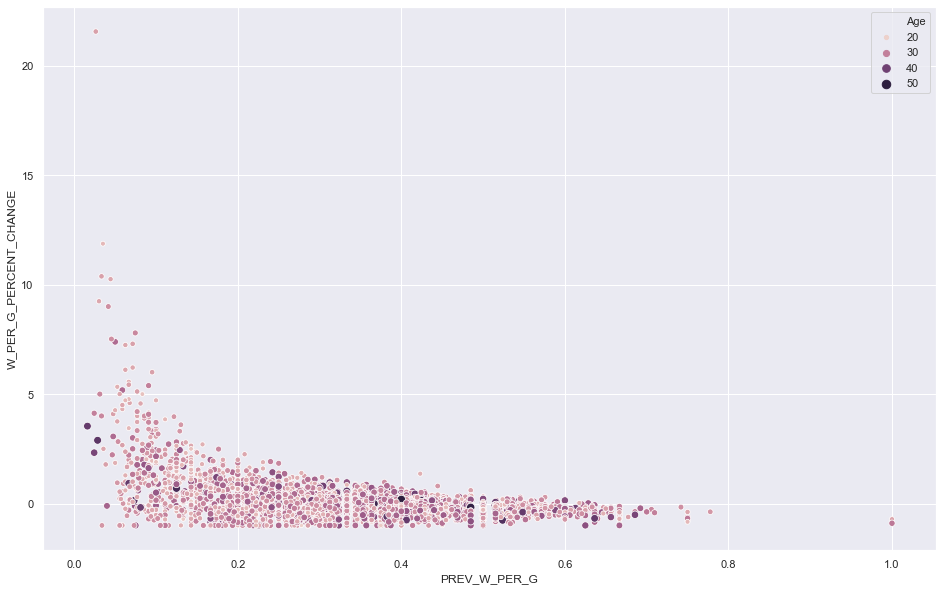

In [7]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_W_PER_G", y="W_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


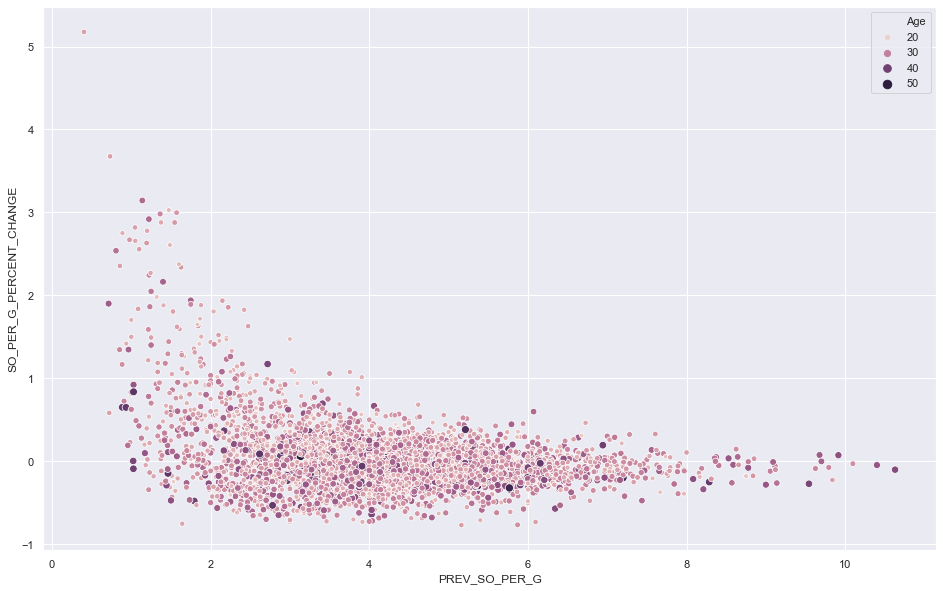

In [8]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_SO_PER_G", y="SO_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


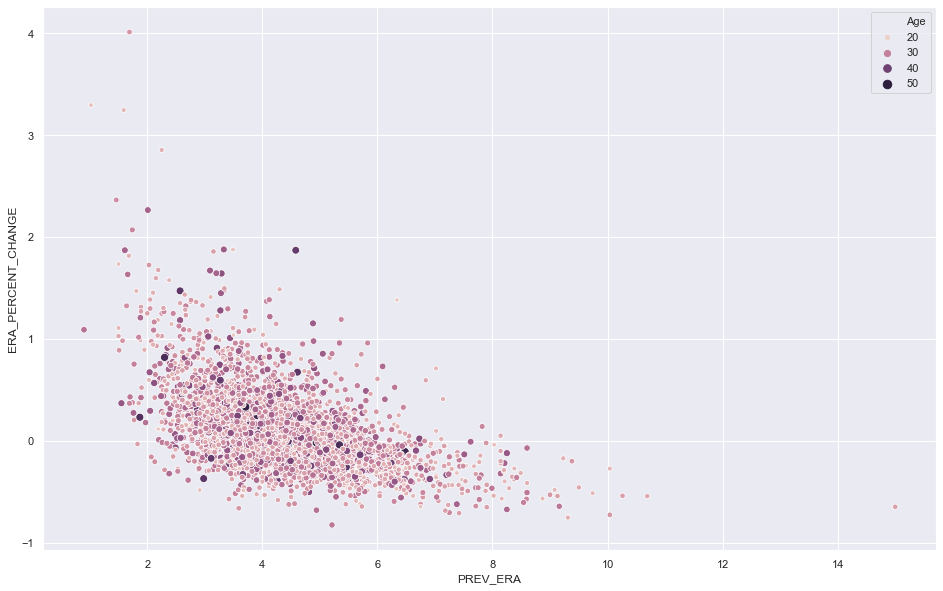

In [9]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_ERA", y="ERA_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


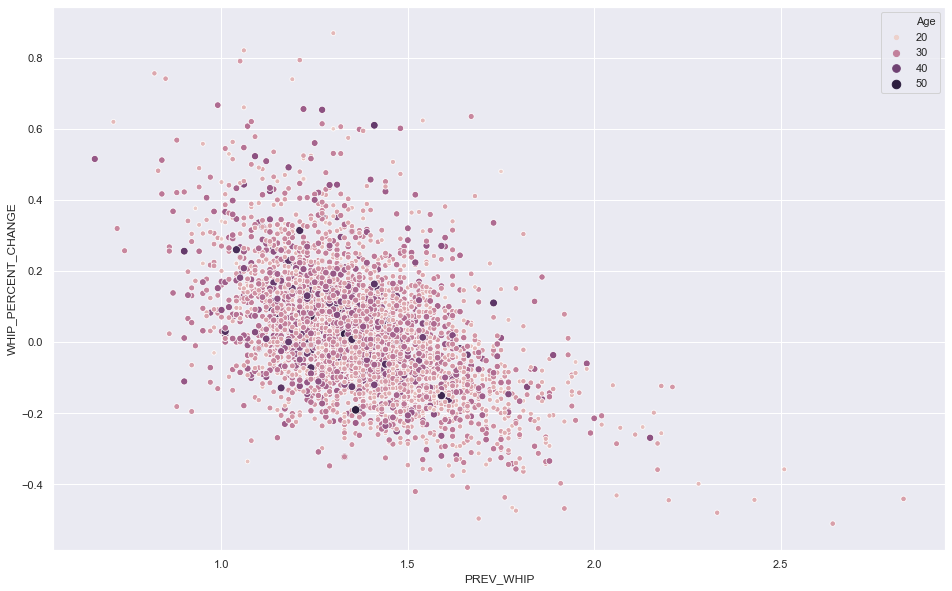

In [10]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_WHIP", y="WHIP_PERCENT_CHANGE", data=df2, size='Age', hue='Age')


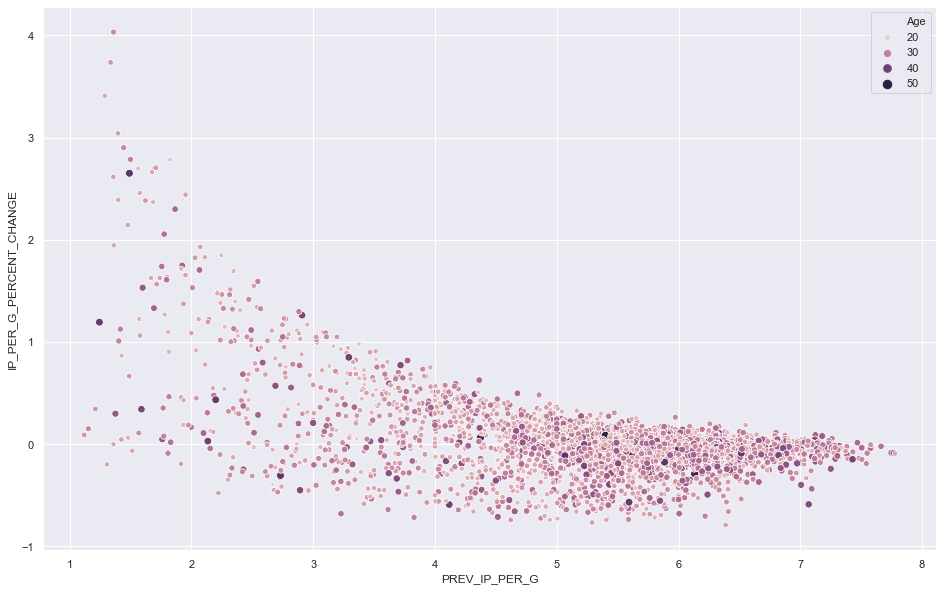

In [11]:
# explore delta of avg by age 
fig = plt.gcf()
fig.set_size_inches(16, 10)
ax = sns.scatterplot(x="PREV_IP_PER_G", y="IP_PER_G_PERCENT_CHANGE", data=df2, size='Age', hue='Age')

In [12]:
mod_wpg = sm.ols(formula="W_PER_G_PERCENT_CHANGE ~ Age + PREV_W_PER_G", data=df2[df2.PREV_W_PER_G > 0]).fit()
print(mod_wpg.summary())

mod_kpg = sm.ols(formula="SO_PER_G_PERCENT_CHANGE ~ Age + PREV_SO_PER_G", data=df2[df2.PREV_SO_PER_G > 0]).fit()
print(mod_kpg.summary())

mod_era = sm.ols(formula="ERA_PERCENT_CHANGE ~ Age + PREV_ERA", data=df2[df2.PREV_ERA > 0]).fit()
print(mod_era.summary())

mod_whip = sm.ols(formula="WHIP_PERCENT_CHANGE ~ Age + PREV_WHIP", data=df2[df2.PREV_WHIP > 0]).fit()
print(mod_whip.summary())

mod_ip_per_g = sm.ols(formula="IP_PER_G_PERCENT_CHANGE ~ Age + PREV_IP_PER_G", data=df2[df2.PREV_IP_PER_G > 0]).fit()
print(mod_ip_per_g.summary())

                              OLS Regression Results                              
Dep. Variable:     W_PER_G_PERCENT_CHANGE   R-squared:                       0.206
Model:                                OLS   Adj. R-squared:                  0.205
Method:                     Least Squares   F-statistic:                     480.1
Date:                    Mon, 23 Mar 2020   Prob (F-statistic):          3.78e-186
Time:                            17:02:05   Log-Likelihood:                -4759.7
No. Observations:                    3712   AIC:                             9525.
Df Residuals:                        3709   BIC:                             9544.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

In [13]:
def determine_change_prob(stat, predicted, age, prev, data, mod):
    ## predicted_avg:  predicted batting average for upcoming season.  
    ##                 Probability of at least this batting average occuring will be returned.
    ##
    ## age:  integer value, age of player in current season
    ## prev_avg: float, previous season's batting average for player
    ## data: pandas dataframe of all observations that trained model
    ## mod: any linear regression statsmodel with a predict function that takes in a pandas dataframe
    
    percent_change = (predicted-prev)/prev
    prev_stat_name = 'PREV_{0}'.format(stat)
    
    ind = ['Age', prev_stat_name]
    row = [age, prev] 

    # create Pandas Series with defined indexes 
    x = pd.Series(row, index = ind) 

    avg_age = np.mean(data['Age'])
    # might need to change how to get previous season's batting average among all players
    avg_prev_avg = np.mean(data[prev_stat_name])
    
    model_mu = mod.predict(x)
    cov = np.cov(df2['Age'],data[prev_stat_name])[0][1]
    ## formula for model variance here https://link.springer.com/content/pdf/bbm%3A978-0-585-25657-3%2F1.pdf
    model_var = mod.params[1]**2 * np.var(data['Age']) + mod.params[2]**2 * np.var(data[prev_stat_name]) + 2*mod.params[1]*mod.params[2]*cov
    model_std = np.sqrt(model_var)
    
    if stat in ['ERA', 'WHIP']:
        prob = scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    else:
        prob = 1-scipy.stats.norm(model_mu, model_std).cdf(percent_change)[0]
    
    return prob, percent_change, predicted


In [14]:
determine_change_prob('ERA', 3.5, 26, 2.5, df2[df2.PREV_ERA > 0], mod_era)

(0.4789236075747325, 0.4, 3.5)